In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 


## 1.Import Necessary Librarires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,jaccard_score,f1_score,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [2]:
df = pd.read_csv('weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


## 3.Initial Analysis

In [3]:
df.shape

(366, 22)

In [4]:
df.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,1.440854,4.702439,8.014939,40.396341,10.414634,18.185976,71.100610,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,1.422561
std,5.945199,6.707310,4.289427,2.681183,3.506646,13.132176,7.811544,8.926759,12.983367,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,4.234023
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,2.000000,4.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.850000,15.500000,0.000000,2.550000,6.000000,31.000000,6.000000,11.000000,63.000000,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.000000
50%,7.900000,20.400000,0.000000,4.400000,8.750000,39.000000,7.000000,17.000000,71.000000,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.000000
75%,12.800000,25.800000,0.200000,6.600000,10.700000,46.000000,13.000000,24.000000,80.000000,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


## 4.Data Preparation 

In [8]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [9]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [10]:
df_sydney_processed = df_sydney_processed.astype(float)

In [11]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Training Data and Testing Data

#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.

In [12]:
x_train, x_test, y_train, y_test = train_test_split( features,Y, test_size=0.2, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (262, 67) (262,)
Test set: (66, 67) (66,)


In [13]:
x_train.shape,y_train.shape

((262, 67), (262,))

In [14]:
x_test.shape,y_test.shape

((66, 67), (66,))

## Linear Regression

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).

In [15]:
LinearReg = LinearRegression()
x = np.asanyarray(x_train)
y = np.asanyarray(y_train)
LinearReg.fit (x, y)
# The coefficients
print ('Coefficients: ', LinearReg.coef_)

Coefficients:  [-0.00720989  0.02082855  0.00784653  0.0211957  -0.01209931 -0.00172977
  0.00908696  0.00082097  0.0034328   0.00652136  0.04071593 -0.04834571
 -0.00059051  0.00804139  0.00407899 -0.01122479  0.04112761  0.03324847
 -0.03324847 -0.06472396 -0.13251054  0.09663562  0.00137517  0.0326481
 -0.14153139  0.02787736 -0.0258718   0.17356262 -0.16905289  0.14733936
 -0.15429206  0.29196977  0.04613203 -0.08825975 -0.04129765 -0.05987546
 -0.138677   -0.10038777 -0.02603379  0.18074339  0.0246143  -0.01079223
 -0.00163572 -0.07759956  0.1267875   0.0007328   0.10173874  0.02747375
 -0.15905216 -0.02288545  0.13484868 -0.09503296  0.02728312 -0.01843472
  0.01771994  0.00075571 -0.15253016  0.10163205  0.06133436 -0.12355306
 -0.22014279 -0.09582732 -0.00571043  0.12964739  0.15936329  0.07553951
  0.13795608]


#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [16]:
predictions = LinearReg.predict(x_test)
x = np.asanyarray(x_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((predictions - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % LinearReg.score(x, y))

Residual sum of squares: 0.06
Variance score: 0.32


#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [17]:
from sklearn.metrics import r2_score
LinearRegression_MAE = np.mean(np.absolute(predictions - y_test))
LinearRegression_MSE = np.mean((predictions -y_test)**2)
LinearRegression_R2 = r2_score(y_test, predictions)
print("Mean absolute error: %.2f" % LinearRegression_MAE)
print("Residual sum of squares (MSE): %.2f" % LinearRegression_MSE)
print("R2-score: %.2f" % LinearRegression_R2 )

Mean absolute error: 0.18
Residual sum of squares (MSE): 0.06
R2-score: 0.32


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model

In [18]:
dict =  { 'error type':['LinearRegression_MAE','LinearRegression_MSE','LinearRegression_R2'],
         'values':[LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]}

In [19]:
pd.DataFrame(dict)

,error type,values
0,LinearRegression_MAE,0.176127
1,LinearRegression_MSE,0.056230
2,LinearRegression_R2,0.319621


In [20]:
from tabulate import tabulate
Report = pd.DataFrame(dict)
print(tabulate(Report, headers = 'keys', tablefmt = 'psql'))

+----+----------------------+-----------+
|    | error type           |    values |
|----+----------------------+-----------|
|  0 | LinearRegression_MAE | 0.176127  |
|  1 | LinearRegression_MSE | 0.0562297 |
|  2 | LinearRegression_R2  | 0.319621  |
+----+----------------------+-----------+


### KNN

#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [21]:
k=4
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [22]:
yhat = neigh.predict(x_test)
yhat[:5]

array([0., 0., 0., 0., 0.])

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [23]:
KNN_accuracy_score = accuracy_score(y_test, yhat)

In [24]:
KNN_jaccard_score = jaccard_score(y_test, yhat)

In [25]:
KNN_f1_score = f1_score(y_test, yhat)

In [26]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        60
         1.0       0.67      0.33      0.44         6

    accuracy                           0.92        66
   macro avg       0.80      0.66      0.70        66
weighted avg       0.91      0.92      0.91        66



In [27]:
confusion_matrix(y_test, yhat)

array([[59,  1],
       [ 4,  2]], dtype=int64)

In [28]:
KNN_log_loss = log_loss(y_test, yhat)

## Decision tree

#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [29]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`

In [30]:
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [31]:
predTree = drugTree.predict(x_test)

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [32]:
Tree_accuracy_score = accuracy_score(y_test,predTree)

In [33]:
Tree_jaccard_score = jaccard_score(y_test,predTree)

In [34]:
Tree_f1_score = f1_score(y_test,predTree)

In [35]:
Tree_log_loss = log_loss(y_test, yhat)

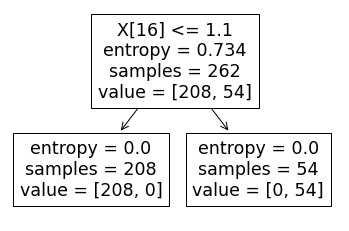

In [36]:
import sklearn.tree as tree
tree.plot_tree(drugTree)
plt.show()

## Logistic regression

#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.

In [37]:
x_train, x_test, y_train, y_test = train_test_split( features,Y, test_size=0.2, random_state=1)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (262, 67) (262,)
Test set: (66, 67) (66,)


In [38]:
from sklearn.linear_model import LogisticRegression

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.

In [39]:
lr = LogisticRegression(solver='liblinear').fit(x_train,y_train)

#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.
​

In [41]:
yhat = lr.predict(x_test)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
yhat_prob = lr.predict_proba(x_test)
yhat_prob

array([[9.97852920e-01, 2.14708040e-03],
       [9.70884968e-01, 2.91150317e-02],
       [8.22663311e-01, 1.77336689e-01],
       [9.97225369e-01, 2.77463116e-03],
       [9.97400724e-01, 2.59927635e-03],
       [9.92223811e-01, 7.77618919e-03],
       [9.96478633e-01, 3.52136727e-03],
       [9.99545485e-01, 4.54514813e-04],
       [9.84267632e-01, 1.57323677e-02],
       [9.92166887e-01, 7.83311301e-03],
       [9.95496716e-01, 4.50328431e-03],
       [9.94494300e-01, 5.50570017e-03],
       [1.76693450e-08, 9.99999982e-01],
       [9.97081717e-01, 2.91828348e-03],
       [1.84306388e-01, 8.15693612e-01],
       [9.99039687e-01, 9.60312860e-04],
       [9.95360798e-01, 4.63920177e-03],
       [9.92747137e-01, 7.25286335e-03],
       [9.14558527e-01, 8.54414734e-02],
       [9.99760012e-01, 2.39987941e-04],
       [9.98805010e-01, 1.19498974e-03],
       [9.96322417e-01, 3.67758320e-03],
       [9.98318415e-01, 1.68158488e-03],
       [9.96102688e-01, 3.89731173e-03],
       [9.821286

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [43]:
LR_jaccard_score = jaccard_score(y_test,yhat)

In [44]:
LR_accuracy_score = accuracy_score(y_test, yhat)

In [45]:
LR_f1_score = f1_score(y_test, yhat)

In [46]:
LR_log_loss = log_loss(y_test, yhat)

### SVM

#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).

In [47]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [48]:
yhat = clf.predict(x_test)
yhat[:5]

array([0., 0., 0., 0., 0.])

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [49]:
SVM_accuracy_score = accuracy_score(y_test,yhat)

In [50]:
SVM_jaccard_score = jaccard_score(y_test,yhat)

In [51]:
SVM_f1_score = f1_score(y_test,yhat,average='weighted')

In [52]:
SVM_log_loss = log_loss(y_test,yhat)

#### Report

#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [53]:
summary = { 'KNN'  : [KNN_accuracy_score,KNN_jaccard_score,KNN_f1_score,KNN_log_loss],
            'Tree' : [Tree_accuracy_score,Tree_jaccard_score,Tree_f1_score,Tree_log_loss],
            'LR'   : [LR_accuracy_score,LR_jaccard_score,LR_f1_score,LR_log_loss],
            'SVM'  : [SVM_accuracy_score,SVM_jaccard_score,SVM_f1_score,SVM_log_loss]   
}

In [54]:
Report = pd.DataFrame(data = summary, index=['Accuracy','Jaccard Index','F1-Score', 'LogLoss'])


In [55]:
print(tabulate(tabular_data=Report,headers='keys',tablefmt='grid'))

+---------------+----------+---------+----------+----------+
|               |      KNN |    Tree |       LR |      SVM |
+===============+==========+=========+==========+==========+
| Accuracy      | 0.924242 | 1       | 0.969697 | 0.984848 |
+---------------+----------+---------+----------+----------+
| Jaccard Index | 0.285714 | 1       | 0.833333 | 0.916667 |
+---------------+----------+---------+----------+----------+
| F1-Score      | 0.444444 | 1       | 0.909091 | 0.984589 |
+---------------+----------+---------+----------+----------+
| LogLoss       | 2.61659  | 2.61659 | 1.04663  | 0.523315 |
+---------------+----------+---------+----------+----------+
